In [ ]:
import pandas as pd
import matplotlib
%matplotlib inline 
import numpy as np

In [ ]:
### Data transformation from previous notebooks
nyc = pd.read_csv('../data/central-park-raw.csv', parse_dates=[0])
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

# More Stacking

In [177]:
# We briefly talked about stacking in the pivot section, here we will
# dive in a little more.
# Vehicle data - https://www.fueleconomy.gov/feg/download.shtml
# Datasets for All Model Years (1984–2018)
auto = pd.read_csv('../data/vehicles.csv.zip')

/Users/matt/.env/36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
auto.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [179]:
auto.head().T

,0,1,2,3,4
barrels08,15.6957,29.9645,12.2078,29.9645,17.3479
barrelsA08,0,0,0,0,0
charge120,0,0,0,0,0
charge240,0,0,0,0,0
city08,19,9,23,10,17
city08U,0,0,0,0,0
cityA08,0,0,0,0,0
cityA08U,0,0,0,0,0
cityCD,0,0,0,0,0
cityE,0,0,0,0,0


In [180]:
auto.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [181]:
auto.dtypes


barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64


In [182]:
# guzzler- if G or T, this vehicle is subject to the gas guzzler tax
auto.guzzler.value_counts()


G    1356
T     964
S      15
Name: guzzler, dtype: int64

In [183]:
auto.groupby('make').size()


make
AM General                               6
ASC Incorporated                         1
Acura                                  310
Alfa Romeo                              54
American Motors Corporation             27
Aston Martin                           142
Audi                                   944
Aurora Cars Ltd                          1
Autokraft Limited                        4
Avanti Motor Corporation                 2
Azure Dynamics                           2
BMW                                   1807
BMW Alpina                               3
BYD                                      5
Bentley                                122
Bertone                                  7
Bill Dovell Motor Car Company            4
Bitter Gmbh and Co. Kg                   5
Bugatti                                  9
Buick                                  641
CCC Engineering                          2
CODA Automotive                          2
CX Automotive                           17
Cadil

In [184]:
auto.groupby(['year', 'make']).size()


year  make                         
1984  AM General                         4
      Alfa Romeo                         4
      American Motors Corporation       20
      Aston Martin                       6
      Audi                              26
      Avanti Motor Corporation           2
      BMW                               16
      Bertone                            2
      Bill Dovell Motor Car Company      2
      Bitter Gmbh and Co. Kg             2
      Buick                             84
      Cadillac                          17
      Chevrolet                        250
      Chrysler                          42
      Dodge                            191
      Ford                             236
      GMC                              156
      Grumman Olson                      2
      Honda                             24
      Import Foreign Auto Sales Inc      1
      Isuzu                             30
      Jaguar                             3
      Jeep       

In [185]:
auto.groupby(['year', 'make']).size().unstack(1)

make,AM General,ASC Incorporated,Acura,Alfa Romeo,American Motors Corporation,Aston Martin,Audi,Aurora Cars Ltd,Autokraft Limited,Avanti Motor Corporation,...,Toyota,VPG,Vector,Vixen Motor Company,Volga Associated Automobile,Volkswagen,Volvo,Wallace Environmental,Yugo,smart
year,,,,,,,,,,,,,,,,,,,,,
1984,4.0,NaN,NaN,4.0,20.0,6.0,26.0,NaN,NaN,2.0,...,77.0,NaN,NaN,NaN,NaN,63.0,37.0,NaN,NaN,NaN
1985,2.0,NaN,NaN,2.0,3.0,6.0,13.0,NaN,NaN,NaN,...,61.0,NaN,NaN,NaN,NaN,25.0,17.0,NaN,NaN,NaN
1986,NaN,NaN,4.0,2.0,2.0,NaN,13.0,NaN,1.0,NaN,...,57.0,NaN,NaN,1.0,1.0,25.0,16.0,NaN,1.0,NaN
1987,NaN,1.0,6.0,5.0,2.0,3.0,20.0,NaN,1.0,NaN,...,64.0,NaN,NaN,NaN,NaN,26.0,16.0,NaN,1.0,NaN
1988,NaN,NaN,4.0,4.0,NaN,3.0,13.0,1.0,NaN,NaN,...,71.0,NaN,NaN,NaN,NaN,20.0,14.0,NaN,2.0,NaN
1989,NaN,NaN,4.0,4.0,NaN,3.0,14.0,NaN,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,16.0,30.0,NaN,2.0,NaN
1990,NaN,NaN,4.0,1.0,NaN,NaN,15.0,NaN,NaN,NaN,...,58.0,NaN,NaN,NaN,NaN,20.0,33.0,NaN,2.0,NaN
1991,NaN,NaN,6.0,5.0,NaN,2.0,12.0,NaN,NaN,NaN,...,58.0,NaN,NaN,NaN,NaN,21.0,19.0,16.0,NaN,NaN
1992,NaN,NaN,9.0,5.0,NaN,2.0,11.0,NaN,1.0,NaN,...,58.0,NaN,1.0,NaN,NaN,19.0,13.0,16.0,NaN,NaN


In [186]:
# .stack undoes .unstack
auto.groupby(['year', 'make']).size().unstack(1).stack()


year  make                         
1984  AM General                         4.0
      Alfa Romeo                         4.0
      American Motors Corporation       20.0
      Aston Martin                       6.0
      Audi                              26.0
      Avanti Motor Corporation           2.0
      BMW                               16.0
      Bertone                            2.0
      Bill Dovell Motor Car Company      2.0
      Bitter Gmbh and Co. Kg             2.0
      Buick                             84.0
      Cadillac                          17.0
      Chevrolet                        250.0
      Chrysler                          42.0
      Dodge                            191.0
      Ford                             236.0
      GMC                              156.0
      Grumman Olson                      2.0
      Honda                             24.0
      Import Foreign Auto Sales Inc      1.0
      Isuzu                             30.0
      Jaguar      

In [187]:
# By default .unstack does innermost level (in this case 1)
auto.groupby(['year', 'make']).size().unstack(0)

year,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
make,,,,,,,,,,,,,,,,,,,,,
AM General,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASC Incorporated,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acura,NaN,NaN,4.0,6.0,4.0,4.0,4.0,6.0,9.0,11.0,...,7.0,11.0,12.0,12.0,14.0,16.0,10.0,12.0,14.0,7.0
Alfa Romeo,4.0,2.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,5.0
American Motors Corporation,20.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aston Martin,6.0,6.0,NaN,3.0,3.0,3.0,NaN,2.0,2.0,2.0,...,6.0,7.0,9.0,11.0,5.0,7.0,10.0,10.0,4.0,NaN
Audi,26.0,13.0,13.0,20.0,13.0,14.0,15.0,12.0,11.0,10.0,...,40.0,34.0,37.0,37.0,43.0,43.0,50.0,39.0,40.0,38.0
Aurora Cars Ltd,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Autokraft Limited,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# If index has name we can use that
auto.groupby(['year', 'make']).size().unstack('make')

make,AM General,ASC Incorporated,Acura,Alfa Romeo,American Motors Corporation,Aston Martin,Audi,Aurora Cars Ltd,Autokraft Limited,Avanti Motor Corporation,...,Toyota,VPG,Vector,Vixen Motor Company,Volga Associated Automobile,Volkswagen,Volvo,Wallace Environmental,Yugo,smart
year,,,,,,,,,,,,,,,,,,,,,
1984,4.0,NaN,NaN,4.0,20.0,6.0,26.0,NaN,NaN,2.0,...,77.0,NaN,NaN,NaN,NaN,63.0,37.0,NaN,NaN,NaN
1985,2.0,NaN,NaN,2.0,3.0,6.0,13.0,NaN,NaN,NaN,...,61.0,NaN,NaN,NaN,NaN,25.0,17.0,NaN,NaN,NaN
1986,NaN,NaN,4.0,2.0,2.0,NaN,13.0,NaN,1.0,NaN,...,57.0,NaN,NaN,1.0,1.0,25.0,16.0,NaN,1.0,NaN
1987,NaN,1.0,6.0,5.0,2.0,3.0,20.0,NaN,1.0,NaN,...,64.0,NaN,NaN,NaN,NaN,26.0,16.0,NaN,1.0,NaN
1988,NaN,NaN,4.0,4.0,NaN,3.0,13.0,1.0,NaN,NaN,...,71.0,NaN,NaN,NaN,NaN,20.0,14.0,NaN,2.0,NaN
1989,NaN,NaN,4.0,4.0,NaN,3.0,14.0,NaN,NaN,NaN,...,66.0,NaN,NaN,NaN,NaN,16.0,30.0,NaN,2.0,NaN
1990,NaN,NaN,4.0,1.0,NaN,NaN,15.0,NaN,NaN,NaN,...,58.0,NaN,NaN,NaN,NaN,20.0,33.0,NaN,2.0,NaN
1991,NaN,NaN,6.0,5.0,NaN,2.0,12.0,NaN,NaN,NaN,...,58.0,NaN,NaN,NaN,NaN,21.0,19.0,16.0,NaN,NaN
1992,NaN,NaN,9.0,5.0,NaN,2.0,11.0,NaN,1.0,NaN,...,58.0,NaN,1.0,NaN,NaN,19.0,13.0,16.0,NaN,NaN


In [189]:
# If index has name we can use that
auto.groupby(['year', 'make']).size().unstack('year')

year,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
make,,,,,,,,,,,,,,,,,,,,,
AM General,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASC Incorporated,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acura,NaN,NaN,4.0,6.0,4.0,4.0,4.0,6.0,9.0,11.0,...,7.0,11.0,12.0,12.0,14.0,16.0,10.0,12.0,14.0,7.0
Alfa Romeo,4.0,2.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,5.0
American Motors Corporation,20.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aston Martin,6.0,6.0,NaN,3.0,3.0,3.0,NaN,2.0,2.0,2.0,...,6.0,7.0,9.0,11.0,5.0,7.0,10.0,10.0,4.0,NaN
Audi,26.0,13.0,13.0,20.0,13.0,14.0,15.0,12.0,11.0,10.0,...,40.0,34.0,37.0,37.0,43.0,43.0,50.0,39.0,40.0,38.0
Aurora Cars Ltd,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Autokraft Limited,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


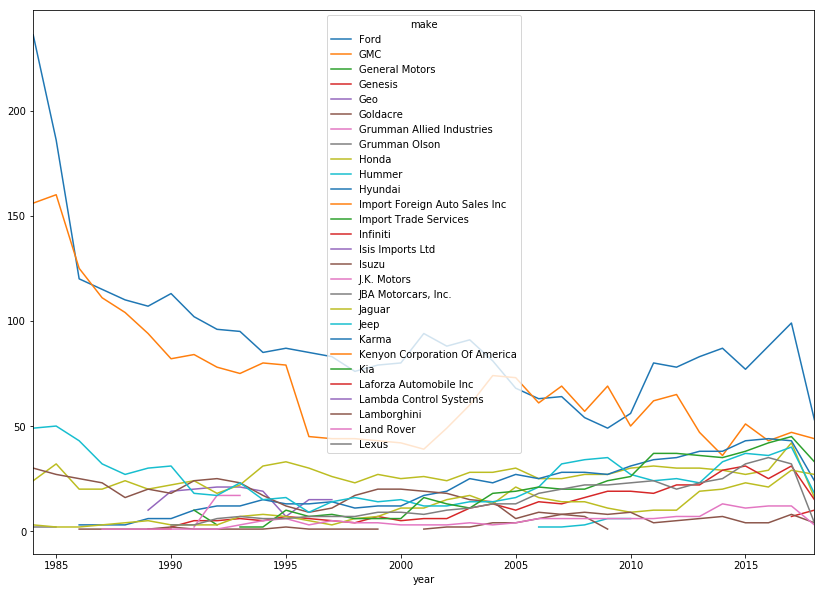

In [190]:
# get Ford through Lexus
auto.groupby(['year', 'make']).size().unstack().loc[:,'Ford':'Lexus'].\
plot(figsize=(14,10)) 

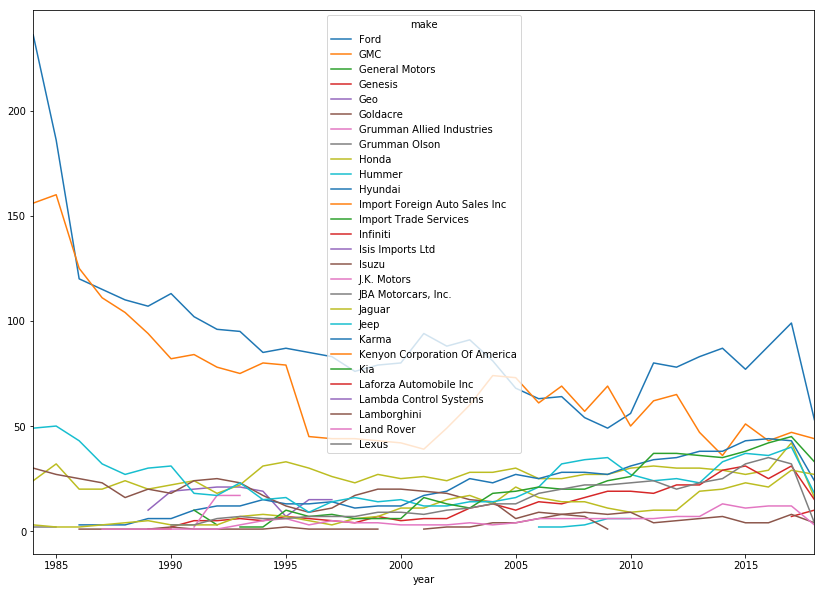

In [191]:
# Wrap with parens to allow per line "flow" style
(
auto.groupby(['year', 'make'])
    .size()
    .unstack('make')
    .loc[:,'Ford':'Lexus']
    .plot(figsize=(14,10)) 
)

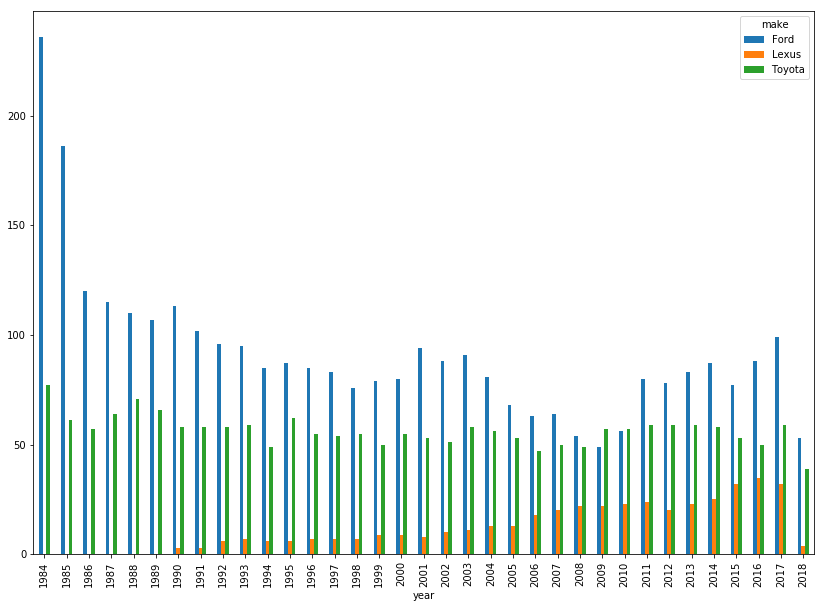

In [192]:
# Just look at Ford, Lexus, & Toyota
auto.groupby(['year', 'make']).size().unstack('make').loc[:,['Ford', 'Lexus', 'Toyota']].\
plot(kind='bar', figsize=(14,10)) 

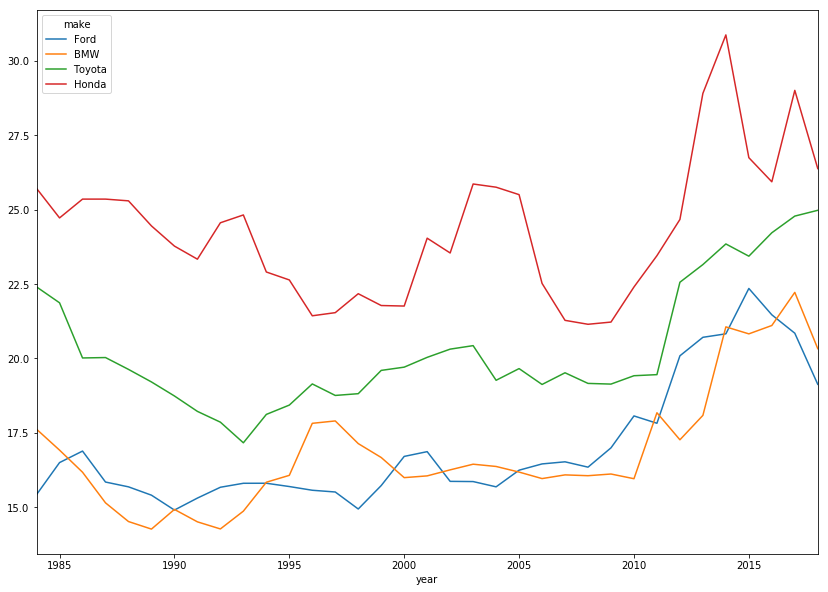

In [193]:
# get the average gas mileage per year
auto.groupby(['year', 'make'])['city08'].mean().unstack('make').\
loc[:,['Ford', 'BMW', 'Toyota', 'Honda']].\
plot(figsize=(14,10)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13de6cbe0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x148d85160>], dtype=object)

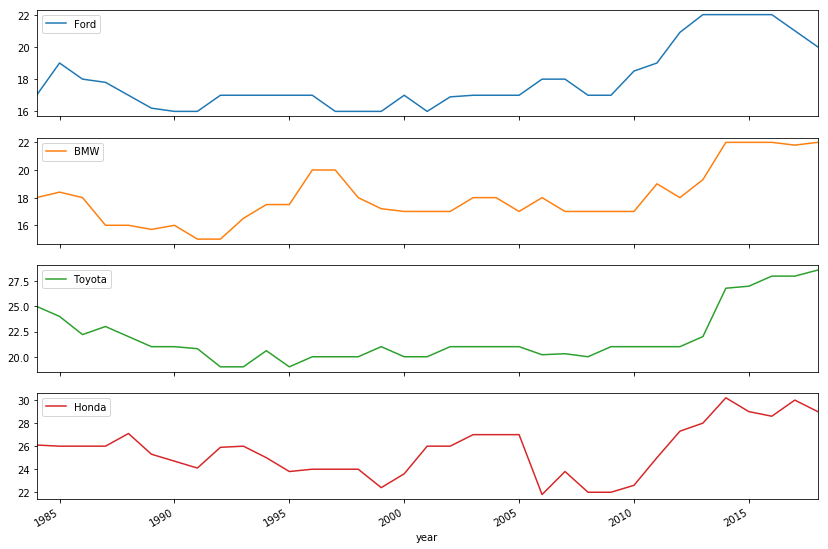

In [194]:
# Get the 70% quantile for each mfr
auto.groupby(['year', 'make'])['city08'].quantile(.7).unstack('make').\
loc[:,['Ford', 'BMW', 'Toyota', 'Honda']].\
plot(subplots=True, sort_columns=True, figsize=(14,10)) 

In [195]:
# Add the drive
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
)


year  make                                drive                     
1984  AM General                          2-Wheel Drive                 15.500000
      American Motors Corporation         4-Wheel or All-Wheel Drive    16.750000
      Buick                               2-Wheel Drive                 15.333333
      Cadillac                            Rear-Wheel Drive              16.750000
      Chevrolet                           2-Wheel Drive                 15.743119
                                          4-Wheel or All-Wheel Drive    14.744681
      Dodge                               2-Wheel Drive                 14.228916
                                          4-Wheel or All-Wheel Drive    13.518519
      Ford                                2-Wheel Drive                 13.393617
                                          4-Wheel or All-Wheel Drive    12.655172
      GMC                                 2-Wheel Drive                 15.743119
                            

In [196]:
# Can unstack multiple times
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .unstack('drive').unstack('make')
)

drive 2-Wheel Drive                                    \
make     AM General ASC Incorporated Acura Alfa Romeo   
year                                                    
1984           15.5              NaN   NaN        NaN   
1985            NaN              NaN   NaN        NaN   
1986            NaN              NaN   NaN        NaN   
1987            NaN              NaN   NaN        NaN   
1988            NaN              NaN   NaN        NaN   
1989            NaN              NaN   NaN        NaN   
1990            NaN              NaN   NaN        NaN   
1991            NaN              NaN   NaN        NaN   
1992            NaN              NaN   NaN        NaN   
1993            NaN              NaN   NaN        NaN   
1994            NaN              NaN   NaN        NaN   
1995            NaN              NaN   NaN        NaN   
1996            NaN              NaN   NaN        NaN   
1997            NaN              NaN   NaN        NaN   
1998            NaN              NaN   NaN        NaN   
1999            NaN              NaN   NaN        NaN   
2000            NaN              NaN   NaN        NaN   
2001            NaN              NaN   NaN        NaN   
2002            NaN              NaN   NaN        NaN   
2003            NaN              NaN   NaN        NaN   
2004            NaN              NaN   NaN        NaN   
2005            NaN              NaN   NaN        NaN   
2006            NaN              NaN   NaN        NaN   
2007            NaN              NaN   NaN        NaN   
2008            NaN              NaN   NaN        NaN   
2009            NaN              NaN   NaN        NaN   
2010            NaN              NaN   NaN        NaN   
2011            NaN              NaN   NaN        NaN   
2012            NaN              NaN   NaN        NaN   
2013            NaN              NaN   NaN        NaN   
2014            NaN              NaN   NaN        NaN   
2015            NaN              NaN   NaN        NaN   
2016            NaN              NaN   NaN        NaN   
2017            NaN              NaN   NaN        NaN   
2018            NaN              NaN   NaN        NaN   

drive                                                                \
make  American Motors Corporation Aston Martin Audi Aurora Cars Ltd   
year                                                                  
1984                          NaN          NaN  NaN             NaN   
1985                          NaN          NaN  NaN             NaN   
1986                          NaN          NaN  NaN             NaN   
1987                          NaN          NaN  NaN             NaN   
1988                          NaN          NaN  NaN             NaN   
1989                          NaN          NaN  NaN             NaN   
1990                          NaN          NaN  NaN             NaN   
1991                          NaN          NaN  NaN             NaN   
1992                          NaN          NaN  NaN             NaN   
1993                          NaN          NaN  NaN             NaN   
1994                          NaN          NaN  NaN             NaN   
1995                          NaN          NaN  NaN             NaN   
1996                          NaN          NaN  NaN             NaN   
1997                          NaN          NaN  NaN             NaN   
1998                          NaN          NaN  NaN             NaN   
1999                          NaN          NaN  NaN             NaN   
2000                          NaN          NaN  NaN             NaN   
2001                          NaN          NaN  NaN             NaN   
2002                          NaN          NaN  NaN             NaN   
2003                          NaN          NaN  NaN             NaN   
2004                          NaN          NaN  NaN             NaN   
2005                          NaN          NaN  NaN             NaN   
2006                          NaN          NaN  NaN       

In [197]:
# Can unstack multiple times
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .loc[(slice(None), # all years
          "Ford",    # Ford rows
          ["Rear-Wheel Drive"])]
    .unstack('drive').unstack('year')
)

drive Rear-Wheel Drive                                                    \
year              1985       1986       1987       1988  1989       1990   
make                                                                       
Ford         14.656566  15.585714  14.920635  14.425926  14.0  13.912281   

drive                                              ...                         \
year        1991       1992       1993       1994  ...        2009       2010   
make                                               ...                          
Ford   14.215686  14.367347  14.294118  14.222222  ...   15.473684  15.833333   

drive                                                          
year   2011  2012  2013  2014     2015  2016       2017  2018  
make                                                           
Ford   14.9  14.5  14.5  14.5  17.0625  16.8  16.892857  17.5  

[1 rows x 34 columns]

In [198]:
# Can unstack multiple times
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .loc[(slice(None), # all years
          "Ford",    # Ford rows
          ["Rear-Wheel Drive"])]  # if we don't make a list here the index won't have drive
    .unstack('drive').unstack('year')
)

drive Rear-Wheel Drive                                                    \
year              1985       1986       1987       1988  1989       1990   
make                                                                       
Ford         14.656566  15.585714  14.920635  14.425926  14.0  13.912281   

drive                                              ...                         \
year        1991       1992       1993       1994  ...        2009       2010   
make                                               ...                          
Ford   14.215686  14.367347  14.294118  14.222222  ...   15.473684  15.833333   

drive                                                          
year   2011  2012  2013  2014     2015  2016       2017  2018  
make                                                           
Ford   14.9  14.5  14.5  14.5  17.0625  16.8  16.892857  17.5  

[1 rows x 34 columns]

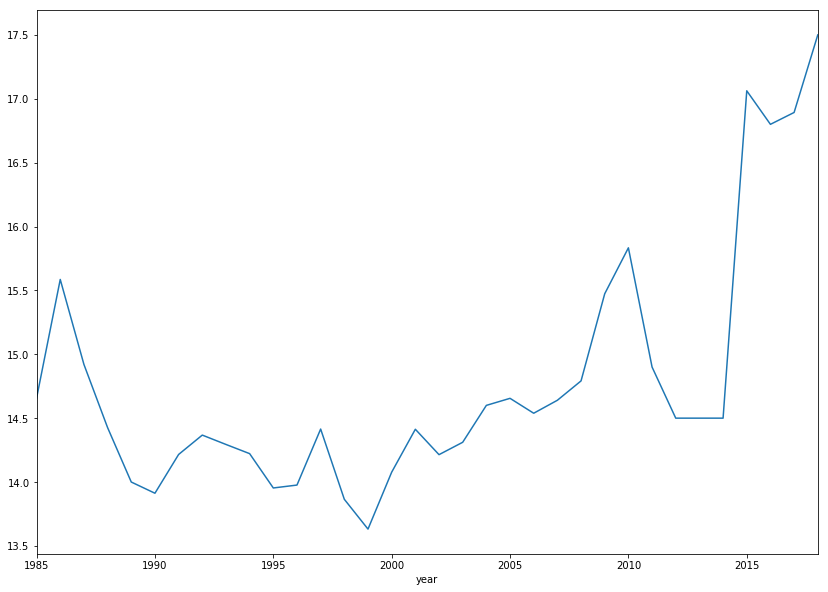

In [199]:
# Simpler may be better
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .loc[(slice(None), # all years
          "Ford",    # Ford rows
          "Rear-Wheel Drive")]
    .plot(figsize=(14,10))
)

## Stacking Assignment

* For each Escape (model) in Ford (make) show the by year avg mpg (city08) in tabular form.
* Visualize the result

In [200]:
auto.head().T

,0,1,2,3,4
barrels08,15.6957,29.9645,12.2078,29.9645,17.3479
barrelsA08,0,0,0,0,0
charge120,0,0,0,0,0
charge240,0,0,0,0,0
city08,19,9,23,10,17
city08U,0,0,0,0,0
cityA08,0,0,0,0,0
cityA08U,0,0,0,0,0
cityCD,0,0,0,0,0
cityE,0,0,0,0,0


In [201]:
print(auto.columns)


Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [202]:
auto.groupby(['model', 'year']).city08.mean()


model              year
1-Ton Truck 2WD    1985    19.500000
                   1986    20.500000
                   1987    20.500000
                   1988    18.000000
                   1989    17.000000
                   1990    16.500000
                   1991    16.000000
                   1992    16.000000
100                1989    16.500000
                   1990    16.000000
                   1991    16.000000
                   1992    16.333333
                   1993    17.000000
                   1994    16.500000
100 Wagon          1989    16.500000
                   1994    16.000000
100 quattro        1989    16.000000
                   1990    16.000000
                   1991    16.000000
                   1992    16.000000
                   1993    16.000000
                   1994    16.000000
100 quattro Wagon  1992    16.000000
                   1993    16.000000
                   1994    16.000000
1000               1984    26.250000
             

In [203]:
auto.groupby(['model', 'year']).city08.mean().unstack('year')

year,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
model,,,,,,,,,,,,,,,,,,,,,
1-Ton Truck 2WD,NaN,19.500000,20.5,20.5,18.0,17.0,16.5,16.000000,16.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,16.5,16.0,16.000000,16.333333,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Wagon,NaN,NaN,NaN,NaN,NaN,16.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 quattro,NaN,NaN,NaN,NaN,NaN,16.0,16.0,16.000000,16.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 quattro Wagon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,26.25,24.714286,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124 Spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.500000,NaN
128ci Convertible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,18.5,18.0,18.5,NaN,NaN,NaN,NaN,NaN
128i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,18.0,18.5,18.0,18.5,NaN,NaN,NaN,NaN,NaN


In [204]:
# if we want to plot by year, we need that in the index
# (so we need to unstack the model)
auto[auto.make == 'Ford'].groupby(['model', 'year']).city08.mean().unstack('model')

model,Aerostar Van,Aerostar Van AWD,Aerostar Wagon,Aerostar Wagon AWD,Aspire,Bronco 4WD,Bronco II 2WD,Bronco II 4WD,C-MAX Energi Plug-In Hybrid,C-MAX Energi Plug-in Hybrid,...,Transit Connect Van FFV,Transit Connect Wagon FFV,Transit Connect Wagon FWD,Transit Connect Wagon LWB FFV,Transit Connect Wagon LWB FWD,Transit T150 Wagon,Transit T150 Wagon FFV,Windstar FWD Cargo Van,Windstar FWD Van,Windstar FWD Wagon
year,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,11.466667,NaN,14.833333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,12.300000,NaN,16.600000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,17.333333,NaN,16.000000,NaN,NaN,13.000000,17.666667,15.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,18.500000,NaN,16.333333,NaN,NaN,11.875000,16.000000,15.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,15.500000,NaN,15.000000,NaN,NaN,11.777778,16.000000,15.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,15.500000,NaN,15.000000,NaN,NaN,11.888889,15.333333,15.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,15.333333,14.0,15.000000,14.0,NaN,11.285714,15.500000,15.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,16.000000,14.0,15.333333,14.0,NaN,11.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,16.333333,14.0,15.000000,14.0,NaN,11.600000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


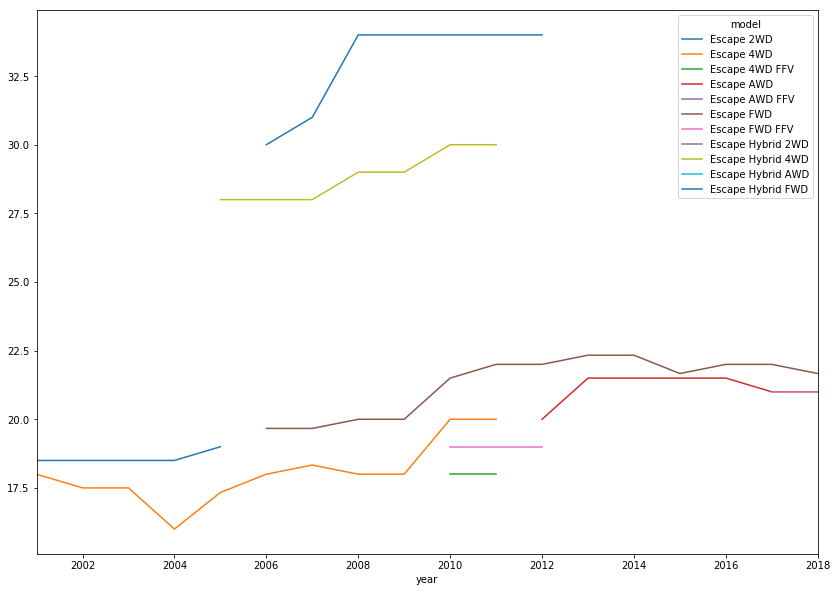

In [205]:
(
    auto[(auto.make == 'Ford') & (auto.model.str.startswith('Escape'))]
    .groupby(['model', 'year'])
    .city08
    .mean()
    .unstack('model')
    .plot(figsize=(14,10))

)


## Extra Groupby

In [207]:
# Find best mpg for each year/make
auto.loc[auto.groupby(['year', 'make']).city08.idxmax()][['year', 'make', 'model', 'city08']]

,year,make,model,city08
19314,1984,AM General,DJ Po Vehicle 2WD,18
18215,1984,Alfa Romeo,Spider Veloce 2000,18
19353,1984,American Motors Corporation,Eagle SX/4 4WD,19
18256,1984,Aston Martin,Lagonda,8
18267,1984,Audi,4000,21
19487,1984,Avanti Motor Corporation,Avanti II,15
18270,1984,BMW,3 Series,21
18216,1984,Bertone,X1/9,20
18503,1984,Bill Dovell Motor Car Company,Dovell 230CE,17
18629,1984,Bitter Gmbh and Co. Kg,SC,12


In [208]:
# only show ford
res = auto.loc[auto.groupby(['year', 'make']).city08.idxmax()][['year', 'make', 'model', 'city08']]
res[res.make.isin(['Ford'])]

,year,make,model,city08
18518,1984,Ford,Escort,35
22283,1985,Ford,Escort,36
10900,1986,Ford,Escort FS,34
24413,1987,Ford,Escort,31
32713,1988,Ford,Festiva,33
33964,1989,Ford,Festiva,33
35222,1990,Ford,Festiva,30
36434,1991,Ford,Festiva,30
37652,1992,Ford,Festiva,30
38827,1993,Ford,Festiva,30
